# Preço de casas em Boston

## Definição do Problema

O conjunto de dados Preço de casas em Boston involve a predição do preço de uma casa em milhares de dolares dado alguns atributos da casa e de sua vizinhança.

É um problema de regressão. Existem 506 observações com 13 features de entrada (atributos da casa e vizinhança) e 1 feature de saída (preço da casa). Os features são os seguintes:

 - CRIM: taxa de criminalidade.
 - ZN: proporção de territorios residenciais divididos em zonas para lotes acima de 25,000 sq.ft.
 - INDUS: proporção de acres de negócios não-varejo.
 - CHAS: Variável fictícia Charles River (= 1 se o limite do setor é rio; 0 caso contrário).
 - NOX: concentração de óxidos nítricos (partes por 10 milhões).
 - RM: número médio de quartos por habitação.
 - IDADE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
 - DIS: distâncias ponderadas para cinco centros de emprego em Boston.
 - RAD: índice de acessibilidade às rodovias radiais.
 - IMPOSTO: taxa de imposto sobre propriedades de valor integral por US 10.000.
 - PTRATIO: relação aluno-professor por cidade.
 - B: 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade.
 - LSTAT: % menor status da população.
 - MEDV: Valor mediano de residências ocupadas pelo proprietário em US 1.000.

### Importação das bibliotecas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler,Normalizer
import seaborn as sns

### Carregando o dataset

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


### Visualização e descrição dos dados

In [5]:
X = boston.data
y = boston.target
X.resize( (506, 14), refcheck=False )

In [6]:
X[:,13] = y

In [7]:
data = pd.DataFrame(X)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0000,2.3100,0.0000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.0
1,0.00000,7.0700,0.0000,0.4690,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,0.02729,21.6
2,7.07000,0.0000,0.4690,7.1850,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,0.03237,0.00000,34.7
3,0.00000,0.4580,6.9980,45.8000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,0.06905,0.00000,2.18000,33.4
4,0.45800,7.1470,54.2000,6.0622,3.00000,222.00000,18.70000,396.90000,5.33000,0.02985,0.00000,2.18000,0.00000,36.2
5,6.43000,58.7000,6.0622,3.0000,222.00000,18.70000,394.12000,5.21000,0.08829,12.50000,7.87000,0.00000,0.52400,28.7
6,66.60000,5.5605,5.0000,311.0000,15.20000,395.60000,12.43000,0.14455,12.50000,7.87000,0.00000,0.52400,6.17200,22.9
7,5.95050,5.0000,311.0000,15.2000,396.90000,19.15000,0.21124,12.50000,7.87000,0.00000,0.52400,5.63100,100.00000,27.1
8,5.00000,311.0000,15.2000,386.6300,29.93000,0.17004,12.50000,7.87000,0.00000,0.52400,6.00400,85.90000,6.59210,16.5
9,311.00000,15.2000,386.7100,17.1000,0.22489,12.50000,7.87000,0.00000,0.52400,6.37700,94.30000,6.34670,5.00000,18.9


In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,65.663145,65.473807,65.638888,66.356726,65.525324,63.678311,64.617366,63.313639,64.922545,64.295561,65.560898,66.421911,64.358904,22.532806
std,141.740229,142.348074,143.863435,143.717389,141.170971,137.990500,139.303329,139.947886,141.341579,140.415864,141.024650,142.473624,139.613153,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.416750,0.454250,0.448250,0.462250,0.458750,0.496500,0.488250,0.488250,0.491500,0.470250,0.441000,0.485250,0.439750,17.025000
50%,6.108850,6.000000,6.099000,6.069500,6.196500,6.318000,6.147500,6.030000,6.095500,6.209800,6.205500,6.134500,5.972500,21.200000
75%,21.747500,21.350000,21.150000,24.000000,24.000000,22.447825,24.000000,21.897500,22.038325,21.170000,23.825000,22.750000,23.922500,25.000000
max,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,711.000000,711.000000,711.000000,711.000000,711.000000,666.000000,50.000000


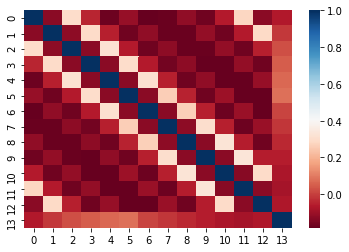

In [9]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu')

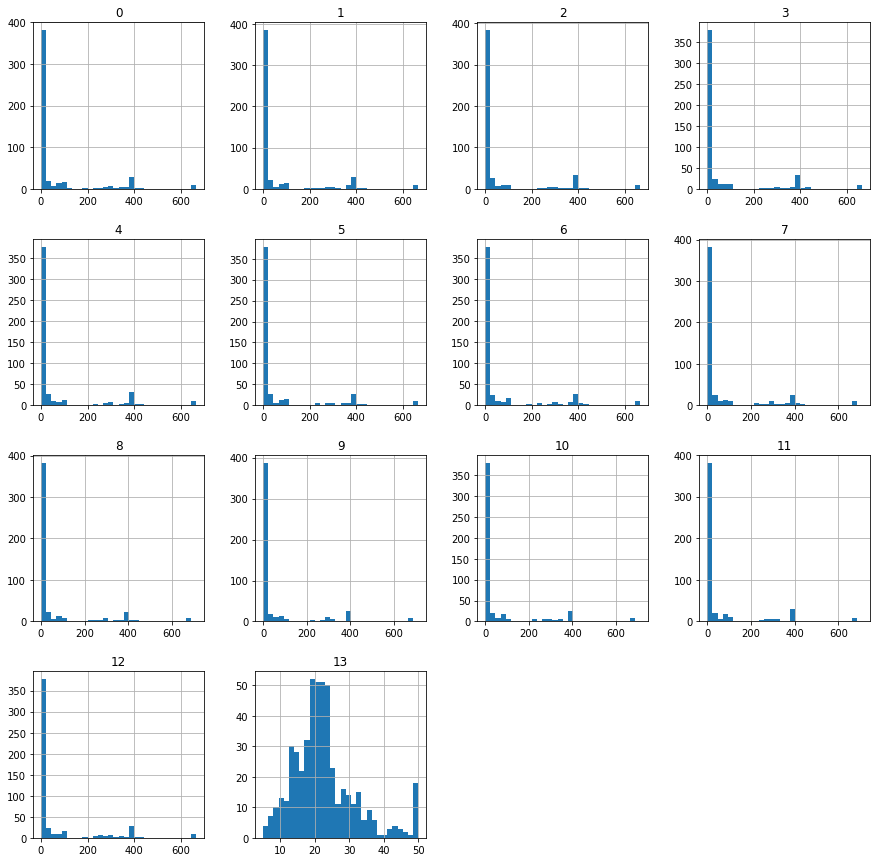

In [47]:
data.hist(figsize=(15,15), bins=30);

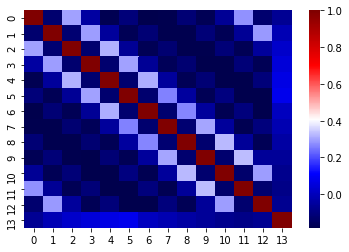

In [35]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='seismic')


### Criação do dataset de validação 

In [15]:
kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=12)

### Criação dos modelos

#### Classificadores utilizados:

- Linear Regression
- Linear SVR
- SVR - Epsilon-Support Vector Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Extra Tree Regressor
- KNN
- SGDC

In [36]:
resultados = {}
resultados['LR'] = { 'model': linear_model.LinearRegression() }
resultados['LSVR'] = { 'model': svm.LinearSVR() }
resultados['SVR'] = { 'model': svm.SVR(kernel='linear') }
resultados['RFR'] = { 'model': ensemble.RandomForestRegressor() }
resultados['GBR'] = {'model': ensemble.GradientBoostingRegressor()}
resultados['ETR'] = {'model': tree.ExtraTreeRegressor()}
resultados['KNN'] = {'model': neighbors.KNeighborsRegressor()}
resultados['SGDC'] = {'model': linear_model.SGDRegressor(max_iter=1000)}

In [37]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['mses'] = []
    resultados[key]['maes'] = []
    for idx_train, idx_test in kfold.split(X, y):
        X_train, y_train = X[idx_train], y[idx_train]
        X_test, y_test = X[idx_test], y[idx_test]
        resultados[key]['model'].fit(X_train, y_train)
        resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
        resultados[key]['mses'].append(metrics.mean_squared_error(y_test, resultados[key]['y_pred']))
        resultados[key]['maes'].append(metrics.mean_absolute_error(y_test, resultados[key]['y_pred']))
    resultados[key]['mse'] = np.mean(resultados[key]['mses'])
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['mae'] = np.mean(resultados[key]['maes'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...
processando SGDC...


In [38]:
df = pd.DataFrame(resultados)
df.T[['y_pred','mse','rmse','mae']]

,y_pred,mse,rmse,mae
ETR,"[34.9, 18.9, 17.5, 13.6, 14.0, 14.9, 18.3, 20....",0.148634,0.38553,0.166765
GBR,"[34.861892433157834, 18.95723944186554, 17.377...",0.0277997,0.166732,0.0965946
KNN,"[27.320000000000004, 23.68, 25.82, 26.6, 23.2,...",77.3483,8.79479,6.49938
LR,"[34.69999999999994, 18.900000000000038, 17.499...",5.2535e-27,7.2481e-14,5.72174e-14
LSVR,"[34.69994535682728, 18.89998741037071, 17.5000...",7.42197e-08,0.000272433,0.000181382
RFR,"[35.26, 18.900000000000002, 17.44, 13.48, 13.8...",0.117587,0.342909,0.162242
SGDC,"[36794965056962.2, 19338471006011.95, 13175164...",7.476e+27,8.64638e+13,6.73348e+13
SVR,"[34.66425712670029, 18.934687523976276, 17.548...",0.0029468,0.0542845,0.0451316


In [39]:
df_T = df.transpose()
df_T = df_T[ ['rmse','mae'] ]
df_T

,rmse,mae
ETR,0.38553,0.166765
GBR,0.166732,0.0965946
KNN,8.79479,6.49938
LR,7.2481e-14,5.72174e-14
LSVR,0.000272433,0.000181382
RFR,0.342909,0.162242
SGDC,8.64638e+13,6.73348e+13
SVR,0.0542845,0.0451316


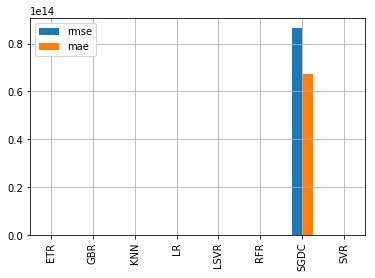

In [40]:
df_T.plot(kind='bar', grid=True);

In [53]:
norm = Normalizer()
std = StandardScaler()
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['mses_norm'] = []
    resultados[key]['maes_norm'] = []
    resultados[key]['mses_std'] = []
    resultados[key]['maes_std'] = []
    for idx_train, idx_test in kfold.split(X, y):
        X_train, y_train = X[idx_train], y[idx_train]
        X_test, y_test = X[idx_test], y[idx_test]
        X_train_std = std.fit_transform(X_train)
        X_train_norm = norm.fit_transform(X_train)
        X_test_norm = norm.transform(X_test)
        X_test_std = std.transform(X_test)
        resultados[key]['model'].fit(X_train_norm, y_train)
        resultados[key]['y_pred_norm'] = resultados[key]['model'].predict(X_test_norm)
        resultados[key]['mses_norm'].append(metrics.mean_squared_error(y_test, resultados[key]['y_pred_norm']))
        resultados[key]['maes_norm'].append(metrics.mean_absolute_error(y_test, resultados[key]['y_pred_norm']))
        resultados[key]['model'].fit(X_train_std, y_train)
        resultados[key]['y_pred_std'] = resultados[key]['model'].predict(X_test_std)
        resultados[key]['mses_std'].append(metrics.mean_squared_error(y_test, resultados[key]['y_pred_std']))
        resultados[key]['maes_std'].append(metrics.mean_absolute_error(y_test, resultados[key]['y_pred_std']))      
    resultados[key]['mse_norm'] = np.mean(resultados[key]['mses_norm'])
    resultados[key]['rmse_norm'] = np.sqrt(resultados[key]['mse_norm'])
    resultados[key]['mae_norm'] = np.mean(resultados[key]['maes_norm'])
    resultados[key]['mse_std'] = np.mean(resultados[key]['mses_std'])
    resultados[key]['rmse_std'] = np.sqrt(resultados[key]['mse_std'])
    resultados[key]['mae_std'] = np.mean(resultados[key]['maes_std'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...
processando SGDC...


In [54]:
df = pd.DataFrame(resultados)
df.T[['rmse_norm','mae_norm','rmse_std','mae_std']]

,rmse_norm,mae_norm,rmse_std,mae_std
ETR,5.15289,3.32318,0.350008,0.161043
GBR,3.15962,2.21174,0.167287,0.0959985
KNN,8.63471,6.41606,5.11099,3.41404
LR,7.96461,6.0432,7.15087e-15,5.45979e-15
LSVR,9.2593,6.54007,2.16251e-06,8.99632e-07
RFR,3.12232,2.11726,0.353828,0.162732
SGDC,9.07645,6.7105,0.000981848,0.000720159
SVR,9.30758,6.60058,0.0546066,0.0455223


In [55]:
df_T = df.transpose()
df_T = df_T[ ['rmse_norm','mae_norm','rmse_std','mae_std'] ]
df_T

,rmse_norm,mae_norm,rmse_std,mae_std
ETR,5.15289,3.32318,0.350008,0.161043
GBR,3.15962,2.21174,0.167287,0.0959985
KNN,8.63471,6.41606,5.11099,3.41404
LR,7.96461,6.0432,7.15087e-15,5.45979e-15
LSVR,9.2593,6.54007,2.16251e-06,8.99632e-07
RFR,3.12232,2.11726,0.353828,0.162732
SGDC,9.07645,6.7105,0.000981848,0.000720159
SVR,9.30758,6.60058,0.0546066,0.0455223


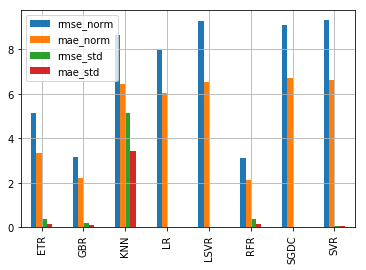

In [56]:
df_T.plot(kind='bar', grid=True);

In [57]:
modelofinal = linear_model.LinearRegression()
modelofinal.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)